Dataset:
Day1_41885+41886+4188+41888_OffSpecSmoothSlice


In [123]:
!pip install pandas

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = '/content/Day1_OffSpecSmooth_Off_Off.csv'
df = pd.read_csv(file_path, sep='\s+', header=None)  # '\s+' is a regex for one or more spaces

# Extract columns into separate variables

Qz = df.iloc[:, 1]
I = df.iloc[:, 2]


# Check the data types
print(df.dtypes)



0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object


In [125]:
import pandas as pd
df.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data, specifying that the first row should be skipped if it's not part of the data
file_path = '/content/Day1_OffSpecSmooth_Off_Off.csv'
df = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, names=['Ki', 'Qz', 'I'])

# Convert 'Qz' and 'I' to numeric, coercing errors to NaN
df['Qz'] = pd.to_numeric(df['Qz'], errors='coerce')
df['I'] = pd.to_numeric(df['I'], errors='coerce')

# Remove any rows with NaN values (if necessary)
df.dropna(inplace=True)

# Check the data types
print(df.dtypes)


Ki    float64
Qz    float64
I     float64
dtype: object


In [127]:
Qz = df.iloc[:, 1]  # Second column
I = df.iloc[:, 2]  # Third column

# Create a hashmap (dictionary) pairing Qz and I
hashmap = dict(zip(Qz, I))

# Print the hashmap to verify
print(hashmap)



{0.0: 0.0, 0.0003554564: 0.0, 0.0007109128: 0.0, 0.001066369: -1.993014e-05, 0.001421826: 0.0, 0.001777282: 0.0, 0.002132738: 0.0, 0.002488195: 0.0, 0.002843651: 0.0, 0.003199108: -2.203976e-05, 0.003554564: -2.203976e-05, 0.00391002: -2.095875e-05, 0.004265477: -2.095875e-05, 0.004620933: -1.982997e-05, 0.00497639: -1.918877e-05, 0.005331846: -1.880805e-05, 0.005687302: 0.0, 0.006042759: -1.783216e-05, 0.006398215: -1.783216e-05, 0.006753672: -1.999631e-05, 0.007109128: -2.129849e-05, 0.007464584: -2.129849e-05, 0.007820041: -1.785319e-05, 0.008175497: -1.785319e-05, 0.008530953: -1.785319e-05, 0.00888641: -1.761379e-05, 0.009241866: -1.761379e-05, 0.009597323: -1.591995e-05, 0.009952779: -1.591995e-05, 0.01030824: -1.591995e-05, 0.01066369: -2.040865e-05, 0.01101915: -2.040865e-05, 0.0113746: -2.040865e-05, 0.01173006: -1.507387e-05, 0.01208552: -1.421594e-05, 0.01244097: -1.421594e-05, 0.01279643: 2.095013e-06, 0.01315189: 3.418329e-06, 0.01350734: -1.45076e-05, 0.0138628: -1.45076e

In [128]:
# Normalize the data by subtracting the minimum value from each element and dividing by the range
df['Qz'] = (df['Qz'] - df['Qz'].min()) / (df['Qz'].max() - df['Qz'].min())
df['I'] = (df['I'] - df['I'].min()) / (df['I'].max() - df['I'].min())

# Print the normalized data
print(df)


              Ki   Qz         I
0      -0.030000  0.0  0.000077
1      -0.029643  0.0  0.000077
2      -0.029286  0.0  0.000077
3      -0.028929  0.0  0.000077
4      -0.028571  0.0  0.000077
...          ...  ...       ...
116436  0.028571  1.0  0.000077
116437  0.028929  1.0  0.000077
116438  0.029286  1.0  0.000077
116439  0.029643  1.0  0.000077
116440  0.030000  1.0  0.000077

[116441 rows x 3 columns]


In [129]:
# PCA

from sklearn.decomposition import PCA

# Create a PCA instance with 2 components
pca = PCA(n_components=2)

# Fit the PCA instance to the normalized data
pca.fit(df[['Qz', 'I']])

# Transform the data using the fitted PCA instance
pca_data = pca.transform(df[['Qz', 'I']])

# Print the transformed data
print(pca_data)

# Print the explained variance ratio for each principal component
print(pca.explained_variance_ratio_)


[[-0.49998923 -0.00340596]
 [-0.49998923 -0.00340596]
 [-0.49998923 -0.00340596]
 ...
 [ 0.49999833  0.001583  ]
 [ 0.49999833  0.001583  ]
 [ 0.49999833  0.001583  ]]
[0.99440774 0.00559226]


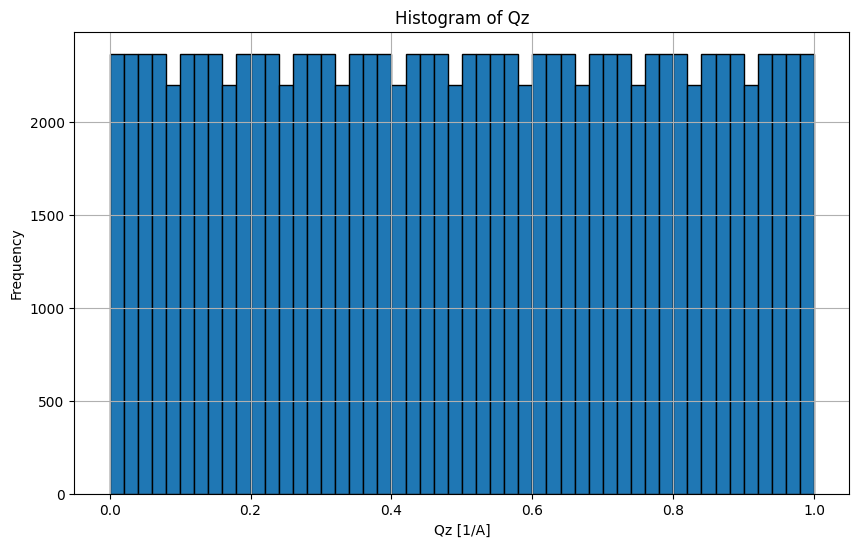

In [130]:
# Plot the histogram of Qz
plt.figure(figsize=(10, 6))
plt.hist(df['Qz'], bins=50, edgecolor='black')
plt.title('Histogram of Qz')
plt.xlabel('Qz [1/A]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



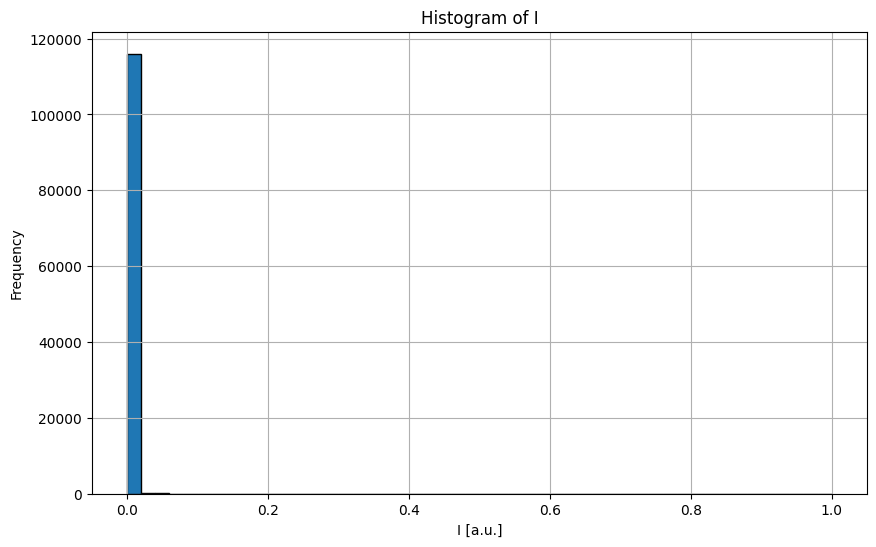

In [131]:
# Plot the histogram of I
plt.figure(figsize=(10, 6))
plt.hist(df['I'], bins=50, edgecolor='black')
plt.title('Histogram of I')
plt.xlabel('I [a.u.]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


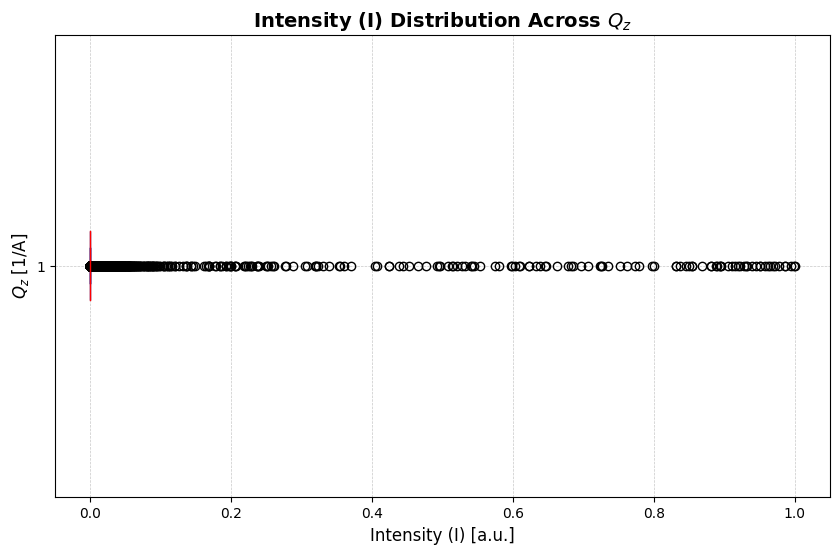

In [132]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the 'I' (Intensity) and 'Qz' data
plt.figure(figsize=(10, 6))

# Create a boxplot of 'I' values
# 'vert=False' makes the boxplot horizontal
# 'patch_artist=True' fills the box with color
boxprops = dict(facecolor='skyblue', edgecolor='navy')  # Customizing box properties for aesthetics
medianprops = dict(color='red')  # Customizing median line properties
whiskerprops = dict(color='navy')  # Customizing whisker properties
capprops = dict(color='navy')  # Customizing cap properties

plt.boxplot(df['I'], vert=False, patch_artist=True, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)

# Setting the title and axis labels
plt.title('Intensity (I) Distribution Across $Q_z$', fontsize=14, fontweight='bold')
plt.xlabel('Intensity (I) [a.u.]', fontsize=12)
plt.ylabel('$Q_z$ [1/A]', fontsize=12)

# Adding a grid for better readability, set to display behind the boxplot
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, zorder=0)

# Show the plot
plt.show()


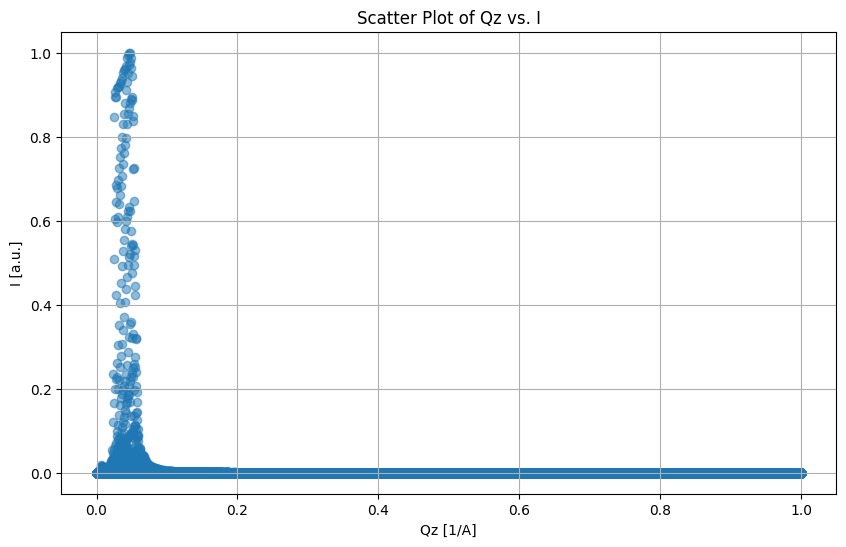

In [133]:
# Plot the scatter plot of Qz vs. I
plt.figure(figsize=(10, 6))
plt.scatter(df['Qz'], df['I'], alpha=0.5)
plt.title('Scatter Plot of Qz vs. I')
plt.xlabel('Qz [1/A]')
plt.ylabel('I [a.u.]')
plt.grid(True)
plt.show()



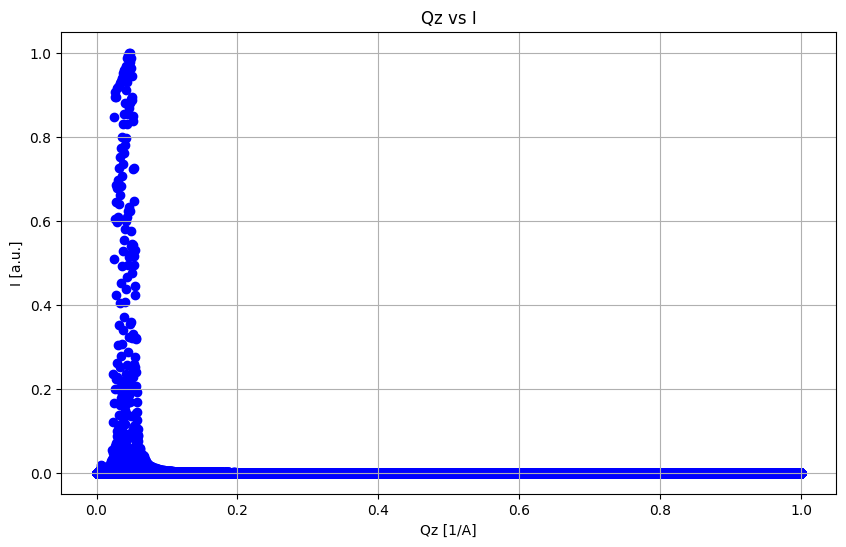

In [134]:
# Plot Qz vs I as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Qz'], df['I'], marker='o', color='blue')
plt.title('Qz vs I')
plt.xlabel('Qz [1/A]')
plt.ylabel('I [a.u.]')
plt.grid(True)
plt.show()

In [135]:
import numpy as np

def calculate_off_specular(specular_data, roughness, theta_i, lambda_neutron, qz, qx):
    """
    Calculate off-specular reflection based on specular data and roughness.

    Parameters:
    - specular_data: array-like, specular reflectivity data as a function of qz (momentum transfer perpendicular to the interface).
    - roughness: float, the root mean square (RMS) roughness of the interface.
    - theta_i: float, incident angle in degrees.
    - lambda_neutron: float, wavelength of the incident neutrons in angstroms.
    - qz: array-like, momentum transfer values perpendicular to the interface for which specular data is provided.
    - qx: array-like, in-plane momentum transfer values for which off-specular scattering is to be calculated.

    Returns:
    - off_specular: array-like, calculated off-specular scattering intensities for the given qx values.
    """

    # Convert incident angle to radians
    theta_i_rad = np.radians(theta_i)

    # Calculate ki, the wavevector of the incident neutrons
    ki = 2 * np.pi / lambda_neutron

    # Calculate kf_z, the out-of-plane component of the scattered wavevector
    kf_z = ki * np.cos(theta_i_rad) - qz

    # Initialize off-specular array
    off_specular = np.zeros_like(qx)

    for i, qx_val in enumerate(qx):
        # Calculate kf_x, the in-plane component of the scattered wavevector
        kf_x = ki * np.sin(theta_i_rad) + qx_val

        # Calculate the magnitude of the scattered wavevector
        kf = np.sqrt(kf_x**2 + kf_z**2)

        # Assuming Gaussian roughness, calculate the off-specular scattering
        # This is a simplified model and might need adjustment for specific cases
        dw_factor = np.exp(-0.5 * (qx_val**2 + (kf - ki)**2) * roughness**2)

        # Interpolate specular data to find reflectivity at kf_z
        reflectivity_at_kf_z = np.interp(kf, qz, specular_data)

        # Calculate off-specular scattering
        off_specular[i] = reflectivity_at_kf_z * dw_factor

    return off_specular



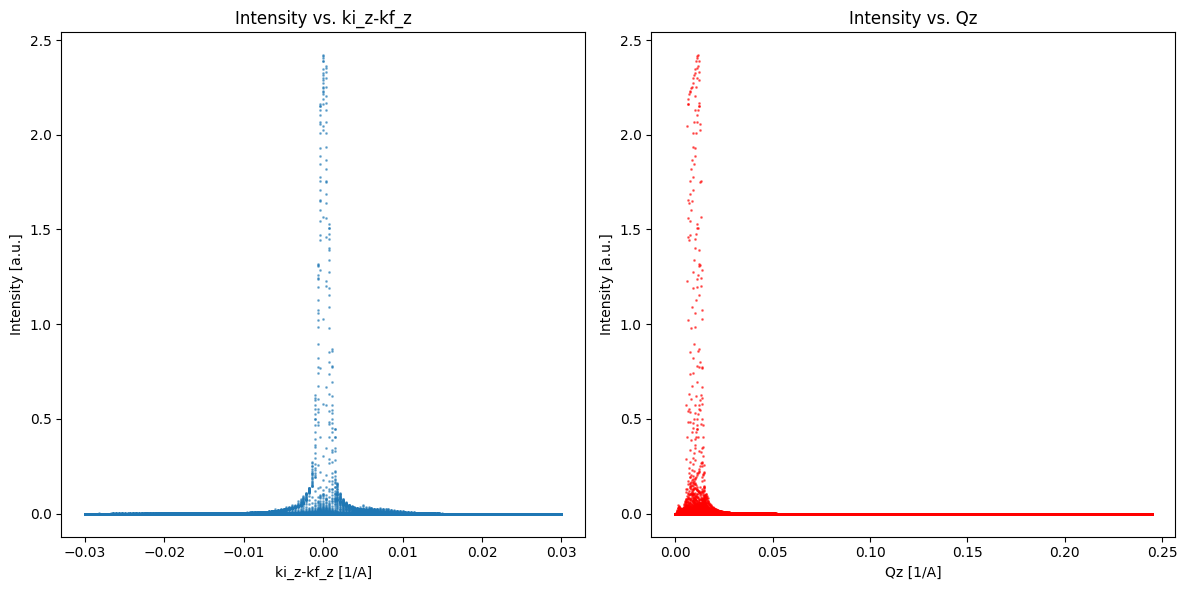

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV file, assuming it's in the same directory as this script
file_path = 'Day1_OffSpecSmooth_Off_Off.csv'

# Re-import the data using tab as the delimiter
data = pd.read_csv(file_path, delimiter='\t')

# Clean up column names by removing extra spaces and units
data.columns = ['ki_z-kf_z', 'Qz', 'Intensity']

# Plotting Intensity as a function of ki_z-kf_z
plt.figure(figsize=(12, 6))

# First subplot for Intensity vs. ki_z-kf_z
plt.subplot(1, 2, 1)
plt.scatter(data['ki_z-kf_z'], data['Intensity'], s=1, alpha=0.5)
plt.title('Intensity vs. ki_z-kf_z')
plt.xlabel('ki_z-kf_z [1/A]')
plt.ylabel('Intensity [a.u.]')

# Second subplot for Intensity vs. Qz
plt.subplot(1, 2, 2)
plt.scatter(data['Qz'], data['Intensity'], s=1, alpha=0.5, color='r')
plt.title('Intensity vs. Qz')
plt.xlabel('Qz [1/A]')
plt.ylabel('Intensity [a.u.]')

plt.tight_layout()
plt.show()


In [137]:
import numpy as np

def generate_qx(lambda_neutron, theta_i_range, theta_f_range):
    """
    Generate a range of Qx values for off-specular neutron scattering analysis.

    Parameters:
    - lambda_neutron: float, wavelength of the neutrons in Angstroms.
    - theta_i_range: tuple or list, range of incident angles in degrees (min, max).
    - theta_f_range: tuple or list, range of scattering angles in degrees (min, max).

    Returns:
    - qx_values: numpy array, range of Qx values calculated.
    """
    # Convert wavelength to meters
    lambda_neutron_m = lambda_neutron * 1e-10  # 1 Angstrom = 1e-10 meters

    # Calculate the wavevector magnitude k
    k = 2 * np.pi / lambda_neutron_m

    # Generate theta_i and theta_f values in radians
    theta_i_vals = np.radians(np.linspace(theta_i_range[0], theta_i_range[1], 100))
    theta_f_vals = np.radians(np.linspace(theta_f_range[0], theta_f_range[1], 100))

    # Initialize an array to store Qx values
    qx_values = []

    # Calculate Qx for each combination of theta_i and theta_f
    for theta_i in theta_i_vals:
        for theta_f in theta_f_vals:
            qx = k * (np.sin(theta_f) - np.sin(theta_i))
            qx_values.append(qx)

    return np.array(qx_values)

# Example usage
lambda_neutron = 4.75  # Neutron wavelength in Angstroms
theta_i_range = (0.5, 1.5)  # Incident angle range in degrees
theta_f_range = (0, 2)  # Scattering angle range in degrees

qx_values = generate_qx(lambda_neutron, theta_i_range, theta_f_range)

# Display some of the generated Qx values
qx_values[:10]  # Displaying the first 10 for brevity
print(len(qx_values))


10000


In [138]:
# Generate Qz from Day1_OffSpecSmooth_Off_Off.csv

# Load the uploaded CSV file, assuming it's in the same directory as this script
file_path = 'Day1_OffSpecSmooth_Off_Off.csv'

# Re-import the data using tab as the delimiter
data = pd.read_csv(file_path, delimiter='\t')

# Clean up column names by removing extra spaces and units
data.columns = ['ki_z-kf_z', 'Qz', 'Intensity']

# Extract Qz column
Qz = data['Qz'].to_numpy()

# Print the generated Qz values
print(Qz)
print(len(off_specular_intensity))


[0.       0.       0.       ... 0.244554 0.244554 0.244554]
10000


In [139]:
import numpy as np

# Function to generate Qx values
def generate_qx(lambda_neutron, theta_i_range, theta_f_range):
    lambda_neutron_m = lambda_neutron * 1e-10  # Convert Angstrom to meters
    k = 2 * np.pi / lambda_neutron_m
    theta_i_vals = np.radians(np.linspace(theta_i_range[0], theta_i_range[1], 100))
    theta_f_vals = np.radians(np.linspace(theta_f_range[0], theta_f_range[1], 100))
    qx_values = k * (np.sin(theta_f_vals[:, None]) - np.sin(theta_i_vals))
    return qx_values.flatten()

# Function to estimate off-specular intensity
def estimate_off_specular(specular_data, Qz, roughness, Qx_values):
    sigma = roughness * 1e-10  # Convert Angstrom to meters
    dw_factor = np.exp(-2 * (Qx_values**2) * (sigma**2))
    interpolated_specular_intensity = np.interp(Qx_values, Qz, specular_data)
    off_specular_intensity = interpolated_specular_intensity * dw_factor
    return off_specular_intensity

# Hypothetical experimental setup and data
lambda_neutron = 4.75  # Neutron wavelength in Angstroms
theta_i_range = (0.5, 1.5)  # Incident angle range in degrees
theta_f_range = (0, 2)  # Scattering angle range in degrees
roughness = 5  # Surface/interface roughness in Angstroms

# Hypothetical specular reflectivity data
Qz = np.linspace(0.01, 0.1, 100)  # Qz values for specular data
specular_data = np.exp(-Qz**2)  # Simulated specular reflectivity data

# Generate Qx values based on the experimental setup
Qx_values = generate_qx(lambda_neutron, theta_i_range, theta_f_range)

# Calculate off-specular intensity based on specular data and roughness
off_specular_intensity = estimate_off_specular(specular_data, Qz, roughness, Qx_values)

# Display some of the calculated off-specular intensities for brevity
off_specular_intensity[:10]
print(len(off_specular_intensity))


10000


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extracting features and target
X = df[['Qz']].values  # Features (reshape if necessary)
y = df['I'].values  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
import tensorflow as tf
from tensorflow.keras import layers

# Building the model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer
])

# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2, verbose=1)
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test set Mean Absolute Error: {mae}")



Epoch 1/10
2329/2329 [==============================] - 8s 3ms/step - loss: 4.9460e-04 - mae: 0.0041 - val_loss: 6.0962e-04 - val_mae: 0.0022
Epoch 2/10
2329/2329 [==============================] - 8s 3ms/step - loss: 4.7234e-04 - mae: 0.0032 - val_loss: 6.1696e-04 - val_mae: 0.0017
Epoch 3/10
2329/2329 [==============================] - 7s 3ms/step - loss: 4.6018e-04 - mae: 0.0026 - val_loss: 6.1167e-04 - val_mae: 0.0019
Epoch 4/10
2329/2329 [==============================] - 8s 3ms/step - loss: 4.5932e-04 - mae: 0.0024 - val_loss: 6.0913e-04 - val_mae: 0.0025
Epoch 5/10
2329/2329 [==============================] - 7s 3ms/step - loss: 4.5857e-04 - mae: 0.0023 - val_loss: 6.0780e-04 - val_mae: 0.0024
Epoch 6/10
2329/2329 [==============================] - 7s 3ms/step - loss: 4.5962e-04 - mae: 0.0024 - val_loss: 6.0961e-04 - val_mae: 0.0029
Epoch 7/10
2329/2329 [==============================] - 8s 4ms/step - loss: 4.5749e-04 - mae: 0.0024 - val_loss: 6.1217e-04 - val_mae: 0.0039
Epoch 

728/728 [==============================] - 1s 2ms/step


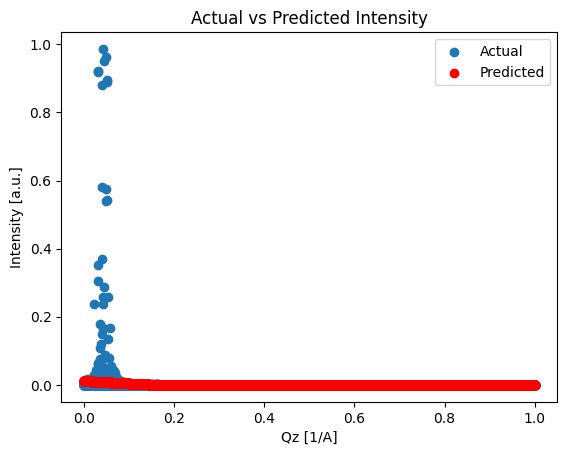

In [141]:
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test_scaled).flatten()

# Plotting
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred, label='Predicted', color='r')
plt.legend()
plt.xlabel('Qz [1/A]')
plt.ylabel('Intensity [a.u.]')
plt.title('Actual vs Predicted Intensity')
plt.show()


In [142]:
input_length = 10000  # Example value; adjust based on your data
num_features = 2  # Using Qx and Qz as features

# Now, you can define your model with these variables
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_length, num_features)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


In [143]:
model.fit(input_data, target_intensities, epochs=100, validation_split=0.2)
predicted_intensities = model.predict(input_data)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(experimental_intensities, predicted_intensities)
print(f'MSE: {mse}')



NameError: name 'input_data' is not defined